In [4]:
import xgboost as xgb
import h5py
import numpy as np
import HDF5Dataset
import matplotlib.pyplot as plt
import matplotlib.axes as axes
from sklearn.metrics import mean_absolute_error

trainDataset = "/home/erynqian/10701/19F10701_Project/testData/sampled/first365.hdf5"
evalDataset = "/home/erynqian/10701/19F10701_Project/testData/sampled/first50.hdf5"

files = []

# Load training dataset
dset = HDF5Dataset.HDF5Dataset(trainDataset)
print("start splitting")
train_data, train_label, eval_data, eval_label = dset.train_val_test()
print("done splitting")
# train_data, train_label = train_dset()
# print(train_data.shape, train_label.shape)

# Load validation dataset
# eval_dset = HDF5Dataset.HDF5Dataset(evalDataset)
# eval_data, eval_label = eval_dset()
# print(eval_data.shape, eval_label.shape)

OSError: Unable to create file (unable to open file: name = '/home/erynqian/10701/19F10701_Project/testData/sampled/first365.hdf5', errno = 17, error message = 'File exists', flags = 15, o_flags = c2)

In [16]:
# Initialize training inputs
starthours = [str(i)+'AM' for i in range(1,13)] + [str(i)+'PM' for i in range(1,13)]
starthours = [starthours[-1]] + starthours[:-1]

# features w one hot
daysofweek = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
start_regions = ["start_EWR", "start_Queens", "start_Bronx", "start_Manhattan", "start_Staten_Island","start_Brooklyn"]
end_regions = ["end_EWR", "end_Queens", "end_Bronx", "end_Manhattan", "end_Staten_Island", "end_Brooklyn"]
feature_names = starthours + months + daysofweek + ['isHoliday'] + start_regions + end_regions + ['distance']

# features w/o one hot
# feature_names = ['StartHour', 'Month', 'DayOfWeek', 'isHoliday', 'StartRegion', 'EndRegion', 'StartLocationID', 'EndLocationID', 'Distance']

print(feature_names)
print(len(feature_names))
dtrain = xgb.DMatrix(train_data, label=train_label, feature_names=feature_names)
dtest = xgb.DMatrix(eval_data, label=eval_label, feature_names=feature_names)
param = {'max_depth': 5, 'eta': 0.6, 
        'subsample': 0.9, 'booster' : 'gbtree',
        'lambda': 1., 'colsample_bytree': 0.9, 'early_stopping_rounds': 5,
        'objective': 'reg:squarederror', 'nthread': 4, 'eval_metric' : 'rmse'}
evallist = [(dtest, 'eval'), (dtrain, 'train')]

model_name = '0004'


['12PM', '1AM', '2AM', '3AM', '4AM', '5AM', '6AM', '7AM', '8AM', '9AM', '10AM', '11AM', '12AM', '1PM', '2PM', '3PM', '4PM', '5PM', '6PM', '7PM', '8PM', '9PM', '10PM', '11PM', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'isHoliday', 'start_EWR', 'start_Queens', 'start_Bronx', 'start_Manhattan', 'start_Staten_Island', 'start_Brooklyn', 'end_EWR', 'end_Queens', 'end_Bronx', 'end_Manhattan', 'end_Staten_Island', 'end_Brooklyn', 'distance']
57


In [3]:
# Training

num_round = 50
result = {}
bst = xgb.train(param, dtrain, num_round, evallist, evals_result=result)
print(result)
bst.save_model(model_name + '.model')
bst.dump_model('dump.raw.txt')


NameError: name 'xgb' is not defined

In [8]:
# Continue training the existing model
param = {'max_depth': 6, 'eta': 0.4, 
        'subsample': 0.9, 'booster' : 'gbtree',
        'lambda': 1., 'colsample_bytree': 0.9, 'early_stopping_rounds': 5,
        'objective': 'reg:squarederror', 'nthread': 4, 'eval_metric' : 'rmse'}
model_path = "/home/erynqian/10701/19F10701_Project/" + model_name + ".model"
bst = xgb.train(param, dtrain, 50, evallist, xgb_model=model_path)


[0]	eval-rmse:5.48957	train-rmse:7.40286
[1]	eval-rmse:5.49434	train-rmse:7.3713
[2]	eval-rmse:5.48652	train-rmse:7.36219
[3]	eval-rmse:5.48181	train-rmse:7.35874
[4]	eval-rmse:5.48026	train-rmse:7.35628
[5]	eval-rmse:5.48001	train-rmse:7.35595
[6]	eval-rmse:5.47847	train-rmse:7.35258
[7]	eval-rmse:5.4751	train-rmse:7.34854
[8]	eval-rmse:5.47337	train-rmse:7.33227
[9]	eval-rmse:5.47647	train-rmse:7.32748
[10]	eval-rmse:5.47245	train-rmse:7.32474
[11]	eval-rmse:5.46674	train-rmse:7.3196
[12]	eval-rmse:5.46401	train-rmse:7.31909
[13]	eval-rmse:5.46337	train-rmse:7.31714
[14]	eval-rmse:5.46095	train-rmse:7.30329
[15]	eval-rmse:5.45969	train-rmse:7.30233
[16]	eval-rmse:5.45761	train-rmse:7.29656
[17]	eval-rmse:5.45468	train-rmse:7.28723
[18]	eval-rmse:5.45067	train-rmse:7.28312
[19]	eval-rmse:5.44787	train-rmse:7.27498
[20]	eval-rmse:5.44735	train-rmse:7.27096
[21]	eval-rmse:5.43313	train-rmse:7.26262
[22]	eval-rmse:5.4337	train-rmse:7.25953
[23]	eval-rmse:5.43466	train-rmse:7.25731
[24]	e

In [2]:
# Plot loss
eval_loss, train_loss = result['eval']['rmse'], result['train']['rmse']
it = list(range(len(eval_loss)))
plt.plot(it, eval_loss)
plt.plot(it, train_loss)
plt.xlabel('Iterations')
plt.ylabel('RMSE loss')
plt.title('XGBoost loss over time')
plt.savefig(model_name + 'XGBoost_loss.png')
plt.show()


NameError: name 'result' is not defined

mean_absolute_error:  4.3651257


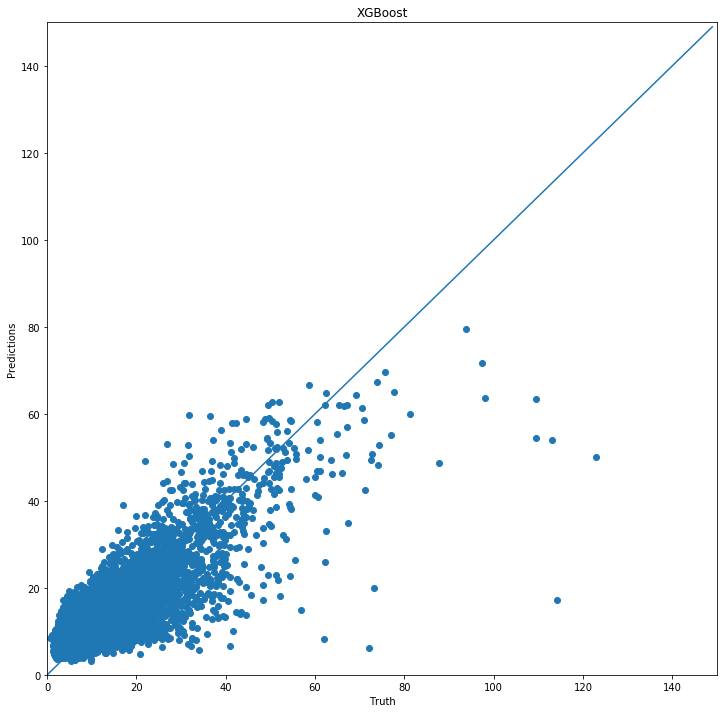

In [19]:
# Test
def Test():
    ypred = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)
    ytruth = eval_label
    print(mean_absolute_error, mean_absolute_error(ytruth, ypred))

plt.figure()
ypred = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)
ytruth = eval_label
print("mean_absolute_error: ", mean_absolute_error(ytruth, ypred))
plt.scatter(ytruth[:10000], ypred[:10000])
plt.xlabel('Truth')
plt.ylabel('Predictions')
r = list(range(150))
plt.plot(r)
plt.xlim((0,150))
plt.ylim((0,150))
plt.title('XGBoost')
plt.savefig(model_name + 'XGBoost.png')


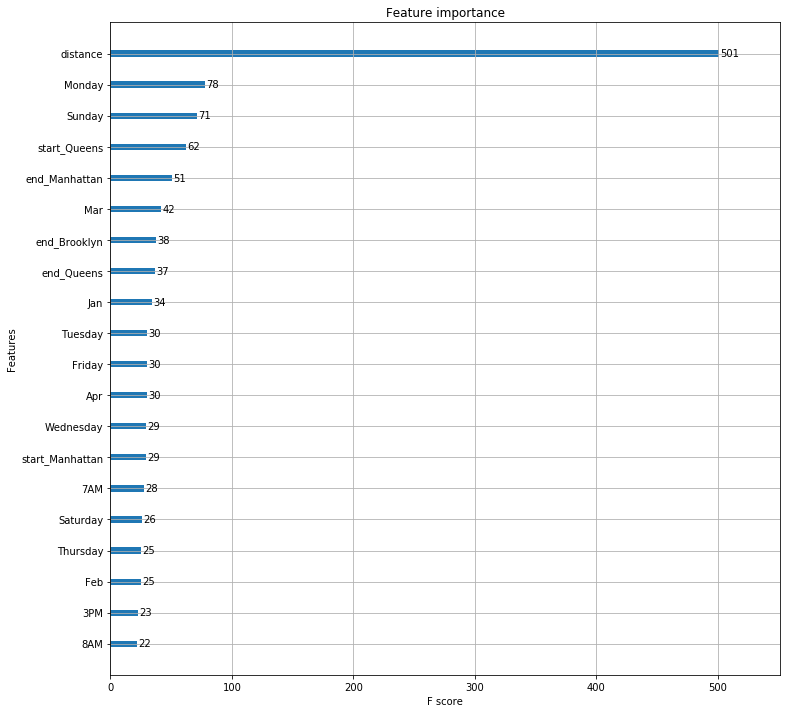

In [20]:
# Plotting
plt.rcParams["figure.figsize"] = (12, 12)
ax = xgb.plot_importance(bst, max_num_features=20)
# xgb.plot_tree(bst, num_trees=2)

In [10]:
fig = ax.figure
fig.savefig(model_name + "XGBoostFeatureRanking.png")